In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('delivery_time.csv')
df.head()


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.shape

(21, 2)

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

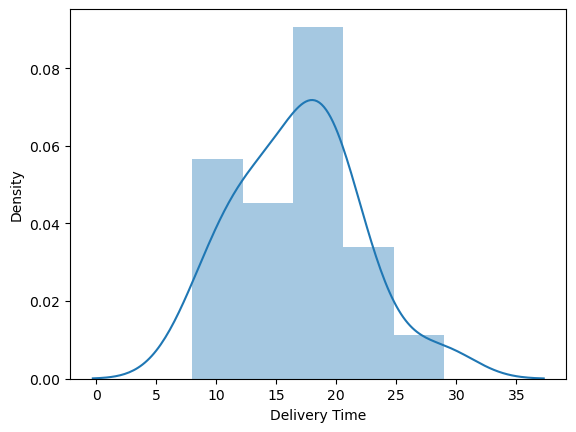

In [5]:
sns.distplot(df['Delivery Time'])

In [6]:
df['log_df'] = np.log(df['Delivery Time'])

<AxesSubplot:xlabel='log_df', ylabel='Density'>

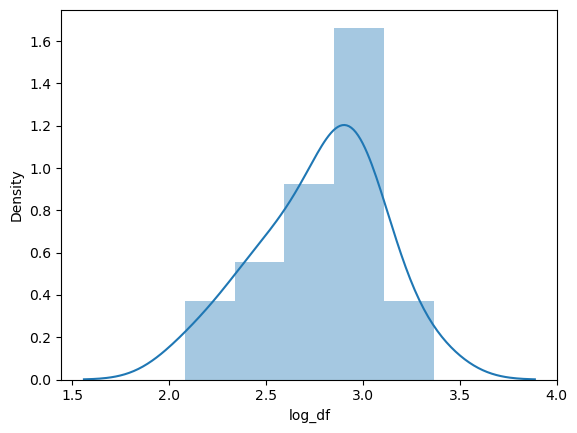

In [7]:
sns.distplot(df['log_df'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

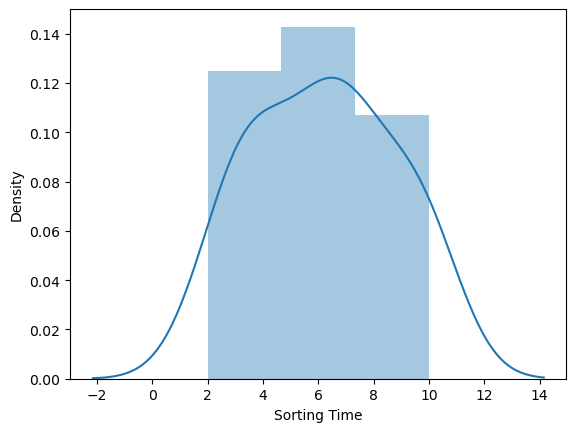

In [8]:
sns.distplot(df['Sorting Time'])

In [9]:
df['log_sorting'] = np.log(df['Sorting Time'])

<AxesSubplot:xlabel='log_sorting', ylabel='Density'>

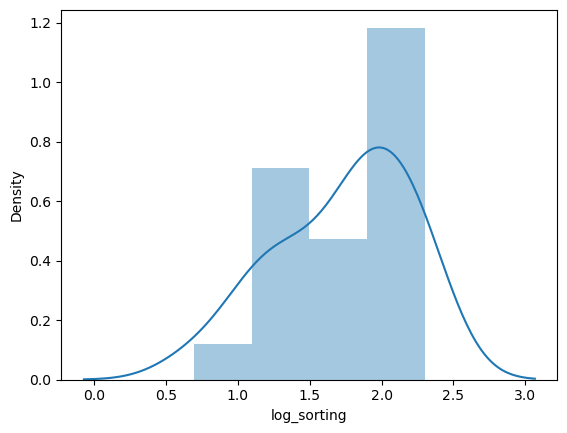

In [10]:
sns.distplot(df['log_sorting'])

In [11]:
df.head()

,Delivery Time,Sorting Time,log_df,log_sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


In [12]:
dl_time = df.rename({'Delivery Time':'Delivery_Time'}, axis=1)
dl_time1 = dl_time.rename({'Sorting Time':'Sorting_Time'},axis=1)

In [13]:
dfnorm_model = smf.ols('Delivery_Time ~ Sorting_Time',data=dl_time1).fit()

In [14]:
dflog_model = smf.ols('log_df ~ log_sorting',data = df).fit()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

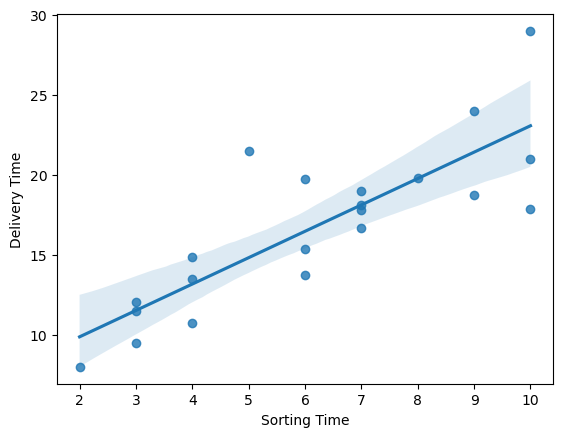

In [15]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=df)

<AxesSubplot:xlabel='log_sorting', ylabel='log_df'>

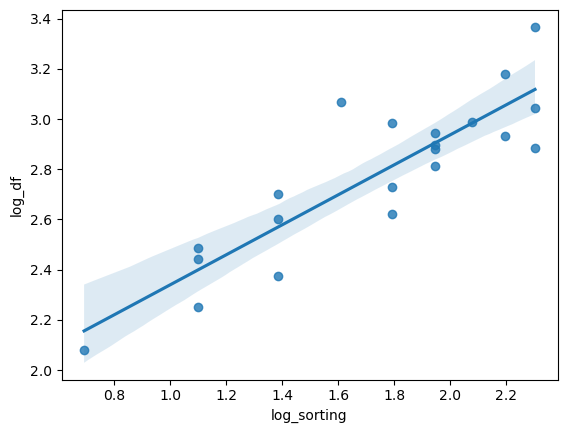

In [16]:
sns.regplot(x='log_sorting',y='log_df',data=df)

In [17]:
dfnorm_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
dflog_model.params

Intercept      1.741987
log_sorting    0.597522
dtype: float64

In [19]:
(dfnorm_model.rsquared,dfnorm_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [20]:
(dflog_model.rsquared,dflog_model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [21]:
accuracy = dflog_model.rsquared

eval_env: 1


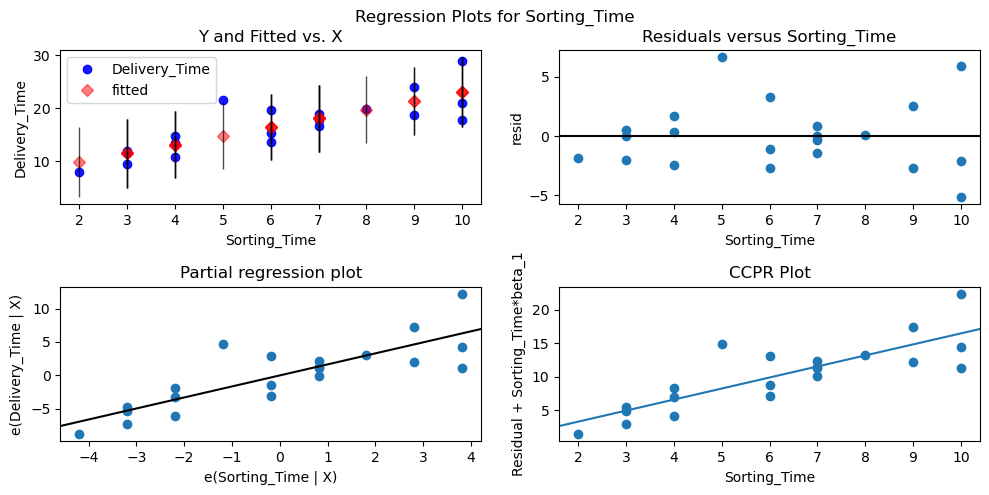

In [22]:
figure = plt.figure(figsize=(10,5))
figure = sm.graphics.plot_regress_exog(dfnorm_model,'Sorting_Time',fig=figure)

eval_env: 1


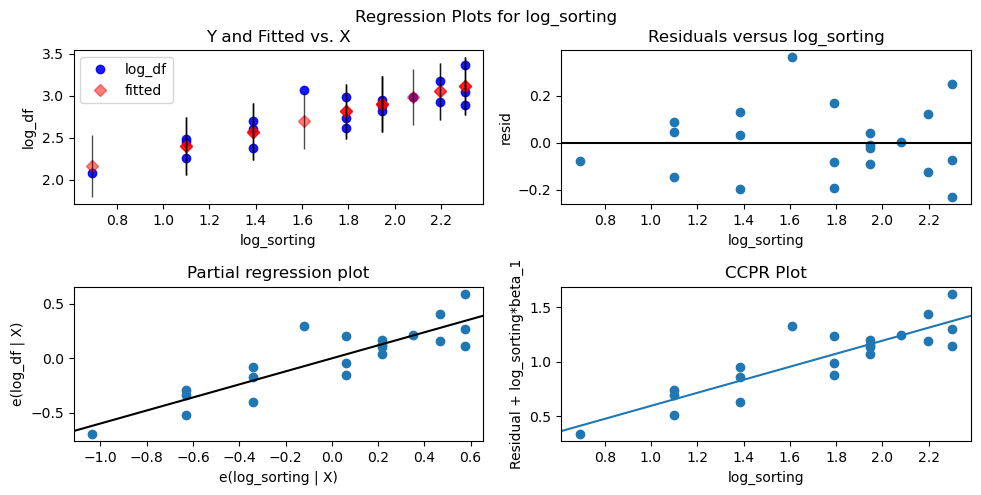

In [23]:
figure = plt.figure(figsize=(10,5))
figure = sm.graphics.plot_regress_exog(dflog_model,'log_sorting',fig=figure)

Log model has more accuracy than normal model 

In [ ]:
print('This model can predict delivery time for sorting time in range:',(df['Sorting Time'].min(),df['Sorting Time'].max()))
print('This model can take sorting time as input and predict delivery time with accuracy of:',accuracy,'%')
newdata = pd.Series([(int(input('Enter sorting time:')))])
data_delivery_time = pd.DataFrame(newdata,columns=['log_sorting'])
Normal_delivery_time = dflog_model.predict((np.log(data_delivery_time)))
print('Based on your sorting time expected delivery time is :',(np.exp((Normal_delivery_time.values)[0])),'minutes')

This model can predict delivery time for sorting time in range: (2, 10)
This model can take sorting time as input and predict delivery time with accuracy of: 0.77216134926874 %
